<a href="https://colab.research.google.com/github/Saivenkat2111/NNDL/blob/main/NNDL_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,InputLayer,Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


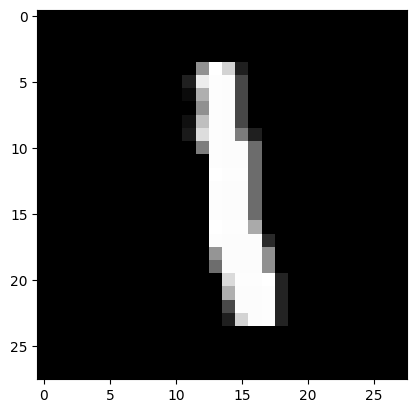

In [3]:
plt.imshow(trainX[6], cmap='gray')

In [4]:
#PREPARE PIXEL DATA
trainX =trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX/255.0
testX = testX/255.0
trainX

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
testX.shape

(10000, 28, 28)

In [6]:
trainy = to_categorical(trainy,num_classes=10)
trainy.shape

(60000, 10)

In [7]:
testy = to_categorical(testy,num_classes=10)
testy.shape

(10000, 10)

In [8]:
model_1=Sequential([
    InputLayer(input_shape=(28,28,1)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [9]:
model_1.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])

In [10]:
mode1=model_1.fit(trainX,trainy,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 80s 52ms/step - loss: 0.1648 - accuracy: 0.9479 - val_loss: 0.0587 - val_accuracy: 0.9828
Epoch 2/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0408 - val_accuracy: 0.9878
Epoch 3/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0506 - val_accuracy: 0.9846
Epoch 4/10
1500/1500 [==============================] - 77s 51ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 5/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 6/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0440 - val_accuracy: 0.9892
Epoch 7/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0406 -

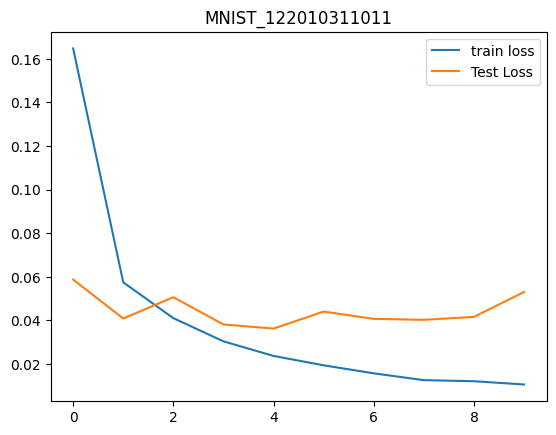

In [11]:
plt.plot(mode1.history['loss'], label='train loss')
plt.plot(mode1.history['val_loss'], label='Test Loss')
plt.title("MNIST_122010311011")
plt.legend()
plt.show()

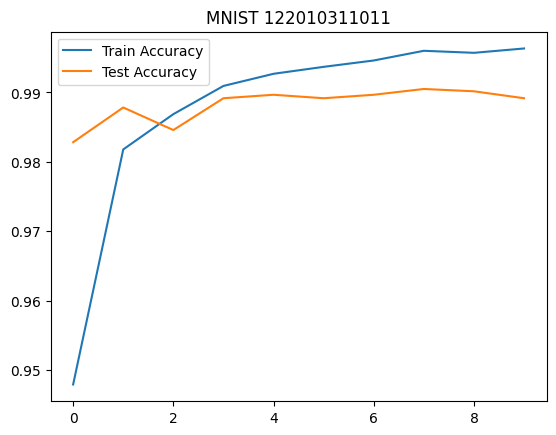

In [12]:
plt.plot(mode1.history['accuracy'], label='Train Accuracy')
plt.plot(mode1.history['val_accuracy'], label='Test Accuracy')
plt.title("MNIST 122010311011")
plt.legend()
plt.show()

In [13]:
model_1.evaluate(testX,testy)

313/313 [==============================] - 5s 14ms/step - loss: 0.0374 - accuracy: 0.9901


[0.0373612716794014, 0.9901000261306763]

In [14]:
import numpy as np

In [15]:
y_pred_enc = model_1.predict(testX)

# actual
y_act = [np.argmax(i) for i in testy]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]


313/313 [==============================] - 4s 13ms/step


In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
pip install nbconvert